In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [46]:
train = pd.read_csv("trainKNN.txt" , header=None,
                 names=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass'],index_col='Id number')

test = pd.read_csv("testKNN.txt" , header=None,
                 names=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass'],index_col='Id number')

In [47]:
print(train.shape)
print(test.shape)

(196, 10)
(18, 10)


In [48]:
features = train.columns[:-1].tolist()
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [49]:
train.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [50]:
print("Null values in train data ",train.isna().sum().sum())
print("Null values in test data ",test.isna().sum().sum())

Null values in train data  0
Null values in test data  0


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 211
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             196 non-null    float64
 1   Na             196 non-null    float64
 2   Mg             196 non-null    float64
 3   Al             196 non-null    float64
 4   Si             196 non-null    float64
 5   K              196 non-null    float64
 6   Ca             196 non-null    float64
 7   Ba             196 non-null    float64
 8   Fe             196 non-null    float64
 9   Type of glass  196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [52]:
train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


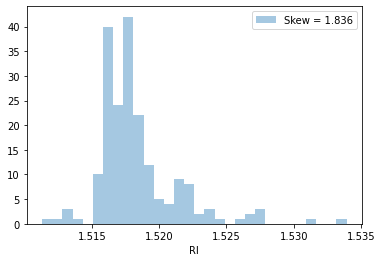

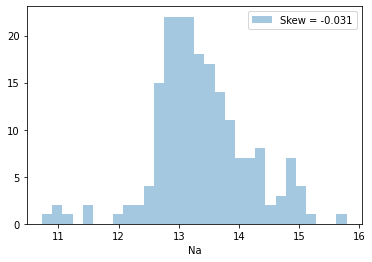

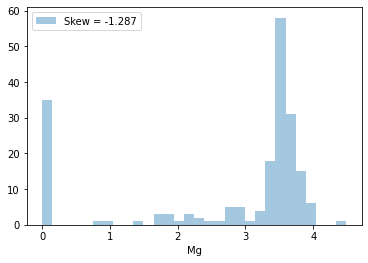

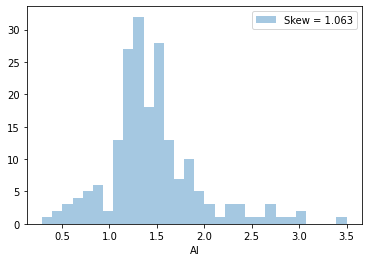

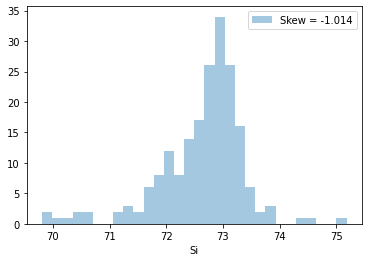

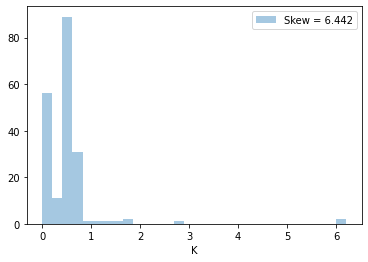

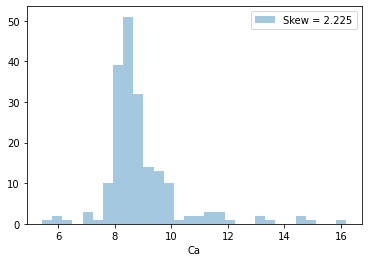

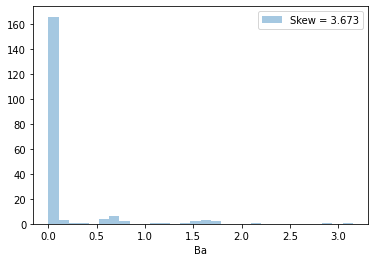

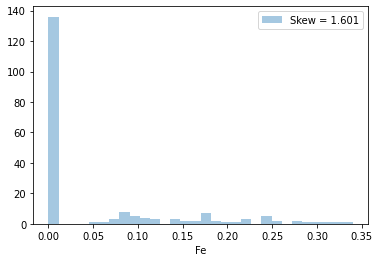

In [53]:
for col in features:
    skew = train[col].skew()
    sns.distplot(train[col],kde=False,label='Skew = %.3f' %(skew),bins=30)
    plt.legend(loc='best')
    plt.show()

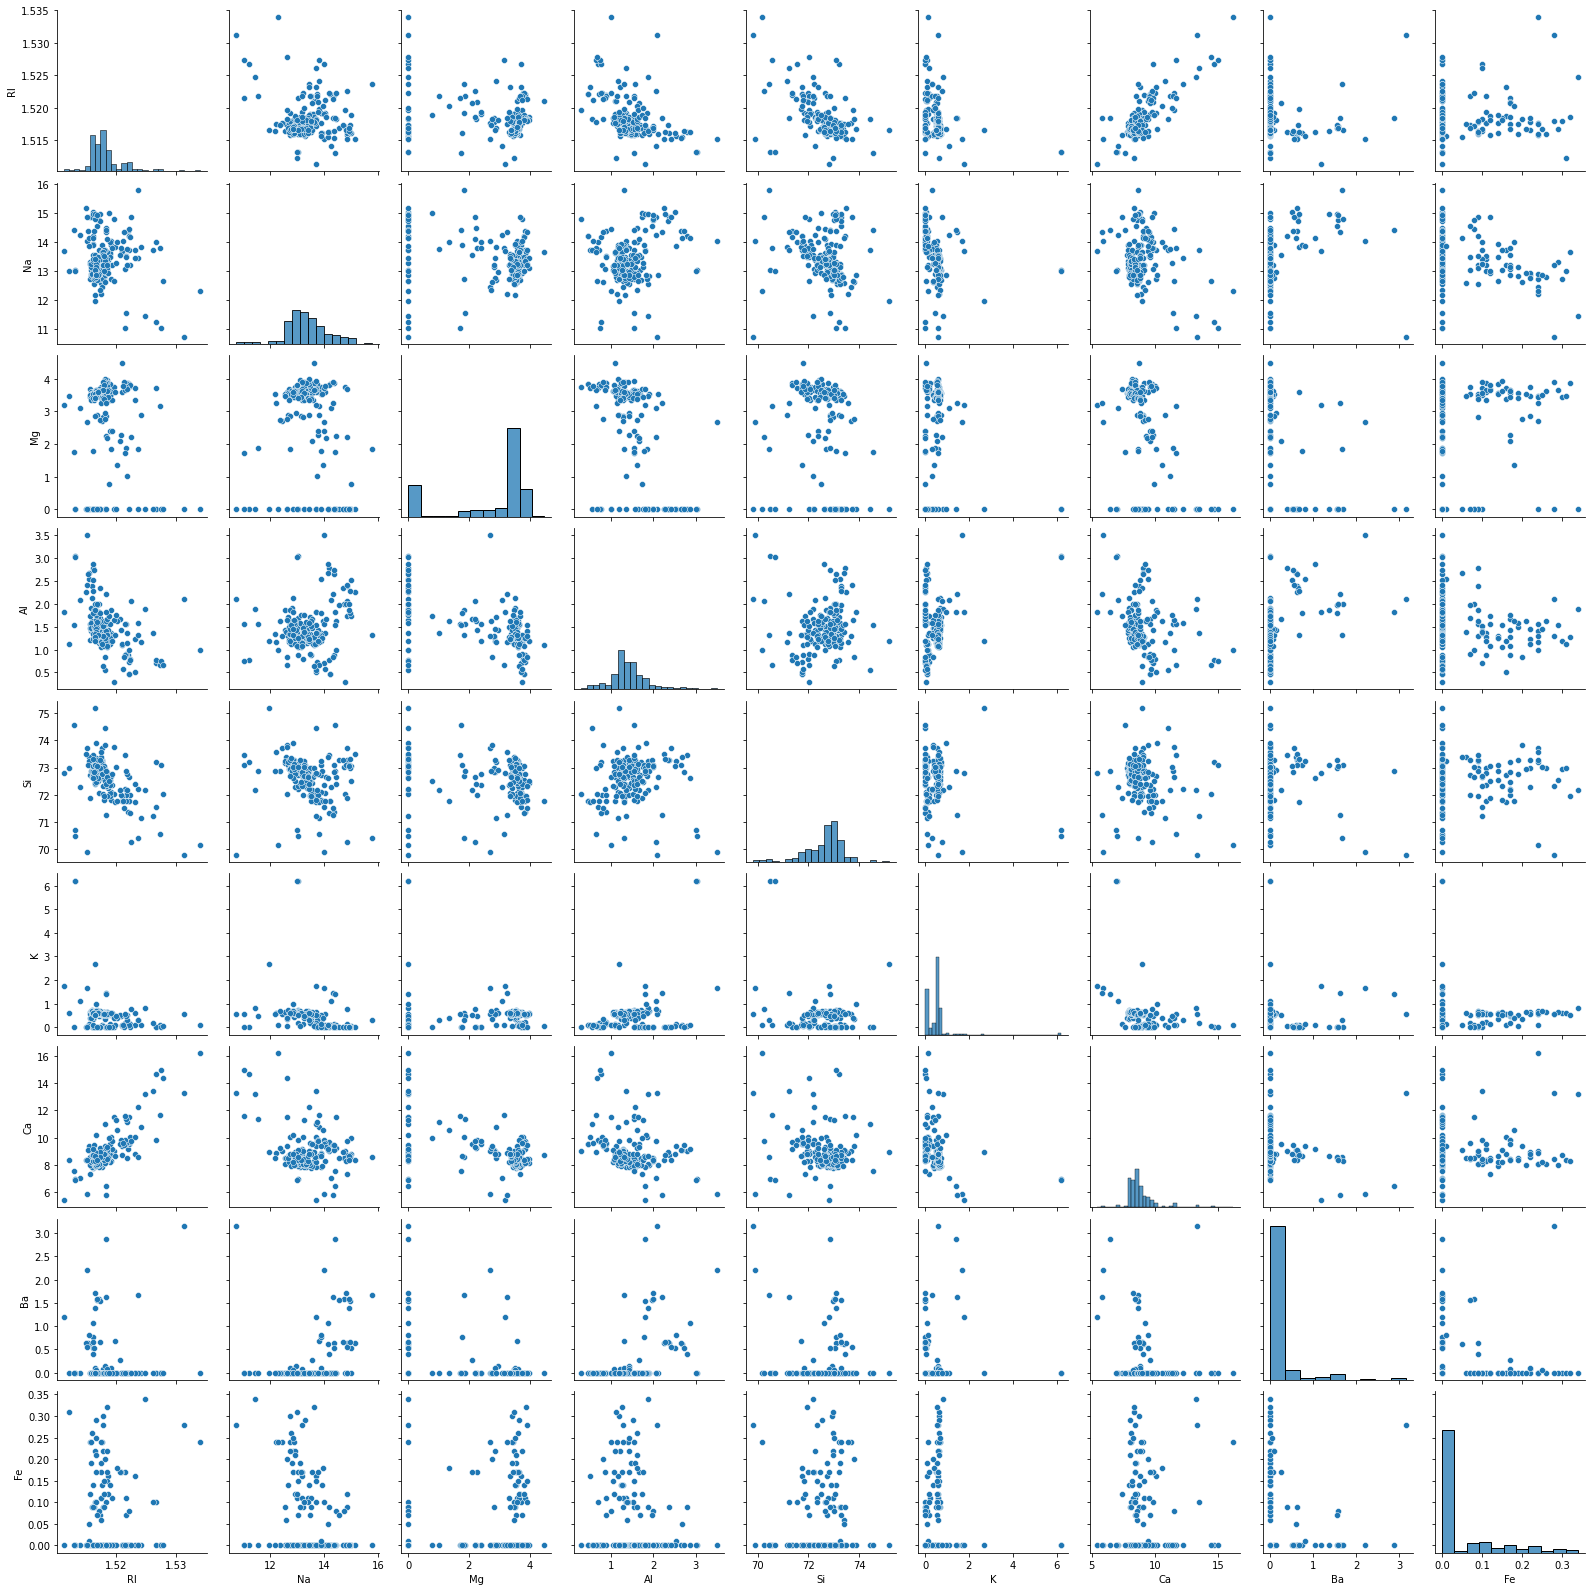

In [54]:
#Pair plot

plt.Figure(figsize=(8,8))
sns.pairplot(train[features],palette='coolwarm')
plt.show()

Examine the heatmap of the corelations

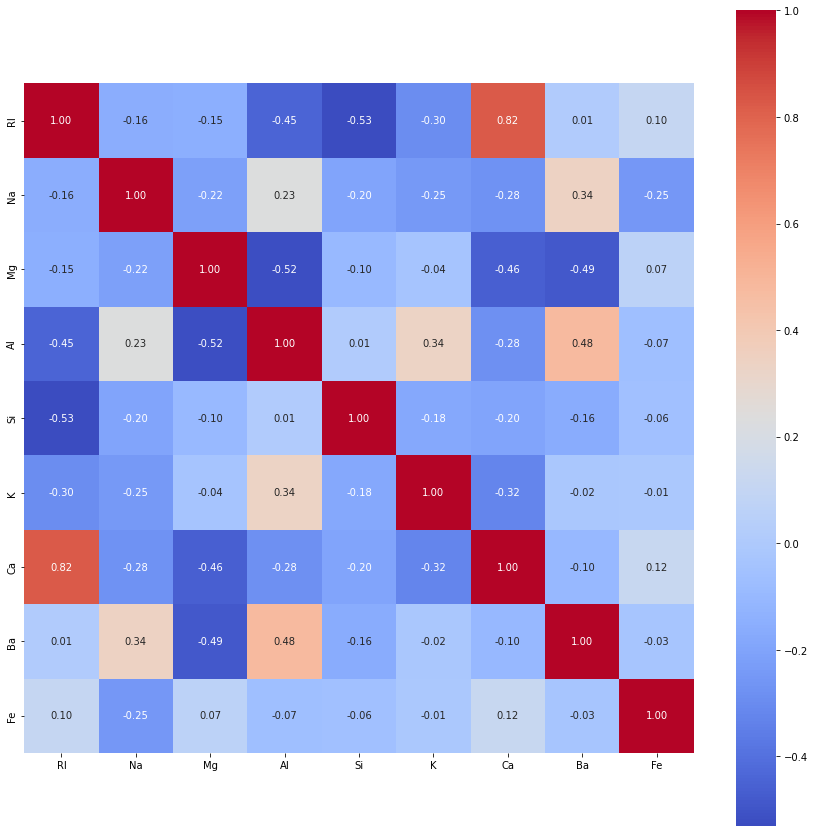

In [55]:
corr = train[features].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,cbar=True,square=True,annot=True,fmt='.2f',xticklabels=features,yticklabels=features,cmap='coolwarm')
plt.show()

There's the strong correlation between Rl & Ca

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

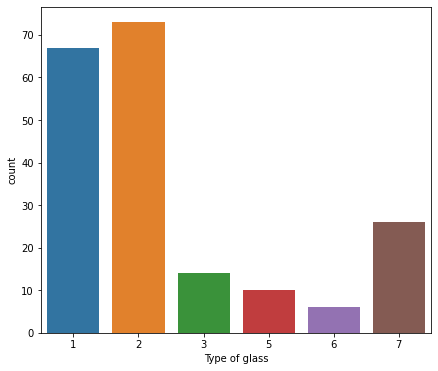

In [57]:
plt.figure(figsize=(7,6))
sns.countplot(train['Type of glass'])
plt.show()

In [58]:
train.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [59]:
x_train = train.drop(columns=['Type of glass',],axis=1)

x_test = test.drop(columns=['Type of glass'],axis=1)


y_train = train['Type of glass']

y_test = test['Type of glass']


In [60]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler

In [61]:
scaler = StandardScaler()
#robust = RobustScaler()

In [62]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Euclidean Metric

In [63]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 


In [64]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='euclidean', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(metric='euclidean')

In [65]:
euclid_pred = classifier.predict(x_test)

In [66]:
euclid_score = accuracy_score(y_test,euclid_pred)
euclid_score = euclid_score*100

print("Accuracy Score of Euclidean Metric ---> ",euclid_score)

Accuracy Score of Euclidean Metric --->  55.55555555555556


In [67]:
classifier.score(x_test,y_test)*100

55.55555555555556

In [68]:
classifier= KNeighborsClassifier(metric='manhattan')  
classifier.fit(x_train, y_train)  
#n_neighbors=5,

KNeighborsClassifier(metric='manhattan')

In [69]:
manhat_pred = classifier.predict(x_test)


In [70]:
manhat_score= accuracy_score(y_test,manhat_pred)*100
print("Accuracy score of Manhattan metric ---> ",manhat_score)

Accuracy score of Manhattan metric --->  55.55555555555556


In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test,manhat_pred))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.40      0.67      0.50         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.56        18
   macro avg       0.60      0.56      0.49        18
weighted avg       0.60      0.56      0.49        18



In [73]:
clf_report = pd.DataFrame(classification_report(y_test, manhat_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")

CLASSIFICATION REPORT:
                  1         2    3         5         6         7  accuracy  \
precision  0.428571  0.400000  0.0  1.000000  1.000000  0.750000  0.555556   
recall     1.000000  0.666667  0.0  0.333333  0.333333  1.000000  0.555556   
f1-score   0.600000  0.500000  0.0  0.500000  0.500000  0.857143  0.555556   
support    3.000000  3.000000  3.0  3.000000  3.000000  3.000000  0.555556   

           macro avg  weighted avg  
precision   0.596429      0.596429  
recall      0.555556      0.555556  
f1-score    0.492857      0.492857  
support    18.000000     18.000000  


In [74]:
clf_report = pd.DataFrame(classification_report(y_test, euclid_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")

CLASSIFICATION REPORT:
              1         2    3         5         6         7  accuracy  \
precision  0.60  0.285714  0.0  1.000000  1.000000  0.750000  0.555556   
recall     1.00  0.666667  0.0  0.333333  0.333333  1.000000  0.555556   
f1-score   0.75  0.400000  0.0  0.500000  0.500000  0.857143  0.555556   
support    3.00  3.000000  3.0  3.000000  3.000000  3.000000  0.555556   

           macro avg  weighted avg  
precision   0.605952      0.605952  
recall      0.555556      0.555556  
f1-score    0.501190      0.501190  
support    18.000000     18.000000  
